# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

![title](img/coffe_add.jpg)

## 1. ETL.
### 💾 1.1. The data.
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

In [1]:
%%capture
pip install geopandas

In [2]:
%%capture
pip install contextily

In [3]:
#dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import contextily as ctx
from shapely.geometry import shape

In [4]:

denver = pd.read_csv('./data/denver.csv')
denver

StoreNumber                            Name     PhoneNumber  \
0   27708-240564  Auraria Tivoli - Student Union      3035563700   
1    75828-94910              Grand Hyatt Denver    303-295-1234   
2    74105-23807          Safeway - Denver #1463    303-722-6117   
3   22871-102491          Safeway - Denver #1248    303-477-5091   
4   11105-100844        Highlands Garden Village    303-455-3382   
..           ...                             ...             ...   
73  78024-107376          The Curtis Hotel Lobby    720-889-4730   
74    2817-86203      Stapleton TC-29th & Quebec    303-322-2477   
75     5425-1281    18th & Franklin - Denver, CO  (303) 320-5518   
76   9193-151286     King Soopers-Denver, CO #26    303-758-1210   
77    237-230005  3rd and Columbine-Cherry Creek      3033319910   

                Street1 Street2 Street3  PostalCode  Longitude  Latitude  
0   900 Auraria Parkway     NaN     NaN       80204    -105.01     39.75  
1        1740 Welton St     NaN     NaN   802023940    -104.99     39.75  
2        2150 S Downing     NaN     NaN   802104528    -104.97     39.68  
3     2660 Federal Blvd     NaN     NaN       80211    -105.02     39.76  
4       4500 W 38th Ave     NaN     NaN   802122001    -105.05     39.77  
..                  ...     ...     ...         ...        ...       ...  
73       1405 Curtis St     NaN     NaN   802022349    -105.00     39.75  
74     7304 E. 29th Ave     NaN     NaN   802382699    -104.90     39.76  
75      1600 E 18th Ave     NaN     NaN   802181202    -104.97     39.74  
76   6470 E Hampden Ave     NaN     NaN   802227605    -104.91     39.65  
77        250 Columbine     160     NaN       80206    -104.96     39.72  

[78 rows x 9 columns]

In [5]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

NBHD_ID             NBHD_NAME  \
0         2               Auraria   
1        21        Cory - Merrill   
2         7               Belcaro   
3        70       Washington Park   
4        71  Washington Park West   
..      ...                   ...   
73       77              Whittier   
74       18                  Cole   
75       76              Westwood   
76       62             Sunnyside   
77       23                   DIA   

                                             geometry  
0   POLYGON ((-105.00042 39.74552, -105.00041 39.7...  
1   POLYGON ((-104.94070 39.69540, -104.94070 39.6...  
2   POLYGON ((-104.94070 39.71156, -104.94069 39.7...  
3   POLYGON ((-104.95931 39.71566, -104.95931 39.7...  
4   POLYGON ((-104.97342 39.68982, -104.97356 39.6...  
..                                                ...  
73  POLYGON ((-104.95977 39.75072, -104.96038 39.7...  
74  POLYGON ((-104.95975 39.76199, -104.96037 39.7...  
75  POLYGON ((-105.03970 39.71125, -105.03849 39.7...  
76  POLYGON ((-104.99818 39.78256, -104.99820 39.7...  
77  POLYGON ((-104.76269 39.79833, -104.76290 39.7...  

[78 rows x 3 columns]

In [6]:
census = pd.read_csv('./data/census.csv')
census

NBHD_ID      NBHD_NAME  POPULATION_2010  AGE_LESS_18  AGE_18_TO_34  \
0         1    Athmar Park           8898.0       2649.0        2406.0   
1         2        Auraria            705.0          7.0         635.0   
2         3          Baker           4879.0        745.0        1762.0   
3         4         Barnum           6111.0       2015.0        1647.0   
4         5    Barnum West           5376.0       1579.0        1380.0   
..      ...            ...              ...          ...           ...   
73       74    West Colfax           9740.0       2756.0        2935.0   
74       75  West Highland           8540.0       1304.0        2555.0   
75       76       Westwood          15486.0       5678.0        4037.0   
76       77       Whittier           4831.0       1119.0        1586.0   
77       78        Windsor          12589.0       1819.0        3302.0   

    AGE_35_TO_65  AGE_65_PLUS  NUM_HOUSEHOLDS  FAMILIES  NUM_HHLD_100K+  
0         3112.0        731.0          2781.0    1964.0           425.0  
1           57.0          6.0            60.0      15.0             NaN  
2         2037.0        335.0          2447.0     833.0             NaN  
3         2089.0        360.0          1782.0    1289.0           120.0  
4         1824.0        593.0          1704.0    1207.0             NaN  
..           ...          ...             ...       ...             ...  
73        3111.0        938.0          3703.0    1971.0           431.0  
74        3756.0        925.0          4256.0    1853.0          1725.0  
75        4712.0       1059.0          4340.0    3306.0           326.0  
76        1788.0        338.0          1993.0    1008.0             NaN  
77        4085.0       3383.0          7204.0    2590.0           723.0  

[78 rows x 10 columns]

### 1.2. Cleaning and transforming the data.

In [7]:
denver = denver.fillna(' ')

In [8]:
census_d = census.drop(['AGE_LESS_18','AGE_35_TO_65','AGE_65_PLUS'], axis=1)
display(census_d.head(), census_d.shape)

NBHD_ID    NBHD_NAME  POPULATION_2010  AGE_18_TO_34  NUM_HOUSEHOLDS  \
0        1  Athmar Park           8898.0        2406.0          2781.0   
1        2      Auraria            705.0         635.0            60.0   
2        3        Baker           4879.0        1762.0          2447.0   
3        4       Barnum           6111.0        1647.0          1782.0   
4        5  Barnum West           5376.0        1380.0          1704.0   

   FAMILIES  NUM_HHLD_100K+  
0    1964.0           425.0  
1      15.0             NaN  
2     833.0             NaN  
3    1289.0           120.0  
4    1207.0             NaN

(78, 7)

In [9]:
neigh_census = pd.merge(neighborhoods, census_d, on=['NBHD_ID', 'NBHD_NAME'])
display(neigh_census.head())

display(neigh_census.isna().sum())
neigh_census_aff = neigh_census.dropna()
display("Affluent households (income +100k USD per year) only:", neigh_census_aff.head(), neigh_census_aff.shape)

NBHD_ID             NBHD_NAME  \
0        2               Auraria   
1       21        Cory - Merrill   
2        7               Belcaro   
3       70       Washington Park   
4       71  Washington Park West   

                                            geometry  POPULATION_2010  \
0  POLYGON ((-105.00042 39.74552, -105.00041 39.7...            705.0   
1  POLYGON ((-104.94070 39.69540, -104.94070 39.6...           3892.0   
2  POLYGON ((-104.94070 39.71156, -104.94069 39.7...           4172.0   
3  POLYGON ((-104.95931 39.71566, -104.95931 39.7...           6905.0   
4  POLYGON ((-104.97342 39.68982, -104.97356 39.6...           6393.0   

   AGE_18_TO_34  NUM_HOUSEHOLDS  FAMILIES  NUM_HHLD_100K+  
0         635.0            60.0      15.0             NaN  
1         906.0          1771.0     959.0             NaN  
2         621.0          2126.0    1162.0             NaN  
3        1589.0          3307.0    1695.0          1739.0  
4        2365.0          3365.0    1291.0          1457.0

NBHD_ID             0
NBHD_NAME           0
geometry            0
POPULATION_2010     0
AGE_18_TO_34        0
NUM_HOUSEHOLDS      0
FAMILIES            0
NUM_HHLD_100K+     30
dtype: int64

'Affluent households (income +100k USD per year) only:'

NBHD_ID             NBHD_NAME  \
3       70       Washington Park   
4       71  Washington Park West   
5       59                 Speer   
6       13          Cherry Creek   
8       20         Congress Park   

                                            geometry  POPULATION_2010  \
3  POLYGON ((-104.95931 39.71566, -104.95931 39.7...           6905.0   
4  POLYGON ((-104.97342 39.68982, -104.97356 39.6...           6393.0   
5  POLYGON ((-104.97325 39.71840, -104.97323 39.7...          10954.0   
6  POLYGON ((-104.94070 39.71156, -104.94091 39.7...           5589.0   
8  POLYGON ((-104.94066 39.74013, -104.94066 39.7...          10235.0   

   AGE_18_TO_34  NUM_HOUSEHOLDS  FAMILIES  NUM_HHLD_100K+  
3        1589.0          3307.0    1695.0          1739.0  
4        2365.0          3365.0    1291.0          1457.0  
5        5361.0          7304.0    1400.0          1682.0  
6        1314.0          3542.0    1194.0          1818.0  
8        3614.0          5724.0    1940.0          1680.0

(48, 8)

## 2. Geospatial Data Visualisation.

### 2.1. Visualisation of Population.

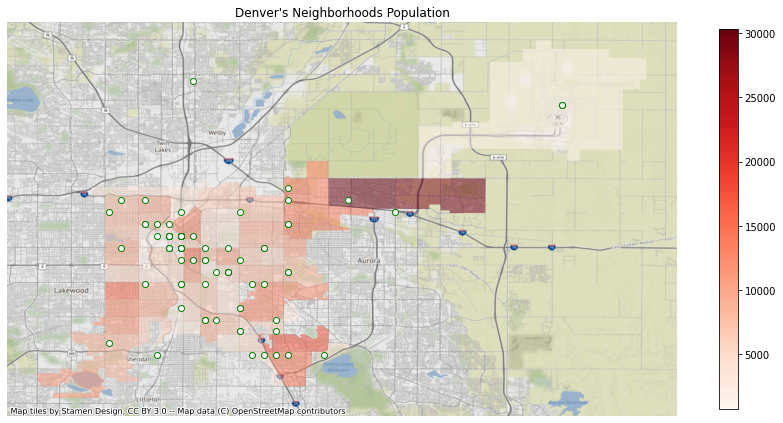

In [10]:
ax = neigh_census.plot(column='POPULATION_2010', figsize=(15,20), cmap='Reds', legend=True, legend_kwds={'shrink': 0.35}, alpha=0.5)
plt.title("Denver's Neighborhoods Population")
ax.set_axis_off()

ax1 = plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')
ctx.add_basemap(ax, crs='EPSG:4326')

plt.show()

### 2.2. Visualisation of Households Number.

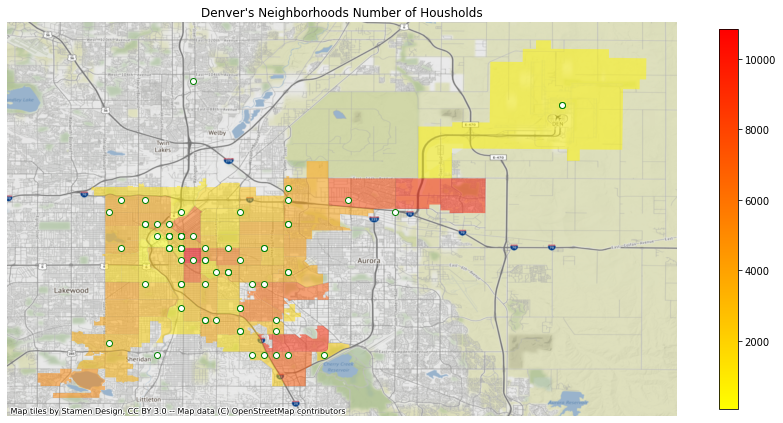

In [11]:
ax = neigh_census.plot(column='NUM_HOUSEHOLDS', figsize=(15,20), cmap='autumn_r', legend=True, legend_kwds={'shrink': 0.35}, alpha=0.5)
plt.title("Denver's Neighborhoods Number of Housholds")
ax.set_axis_off()

plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')
ctx.add_basemap(ax, crs='EPSG:4326')

plt.show()

### 2.3. Visualisation of Number of Families.

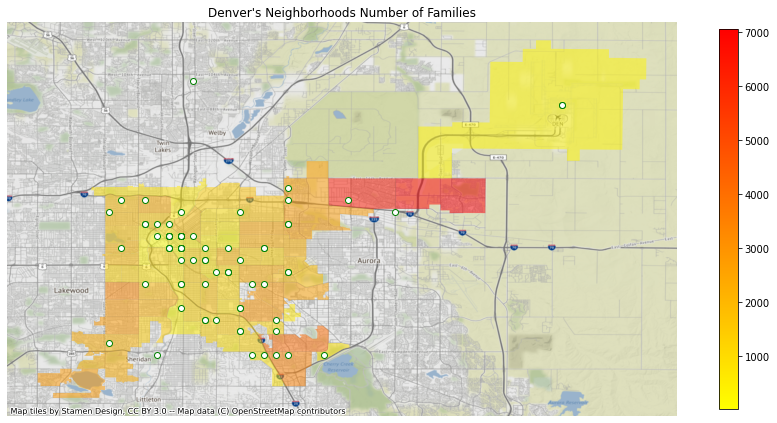

In [12]:
ax = neigh_census.plot(column='FAMILIES', figsize=(15,20), cmap='autumn_r', legend=True, legend_kwds={'shrink': 0.35}, alpha=0.5)
plt.title("Denver's Neighborhoods Number of Families")
ax.set_axis_off()

plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')
ctx.add_basemap(ax, crs='EPSG:4326')

plt.show()

### 2.4. Visualisation of Affluent Households.

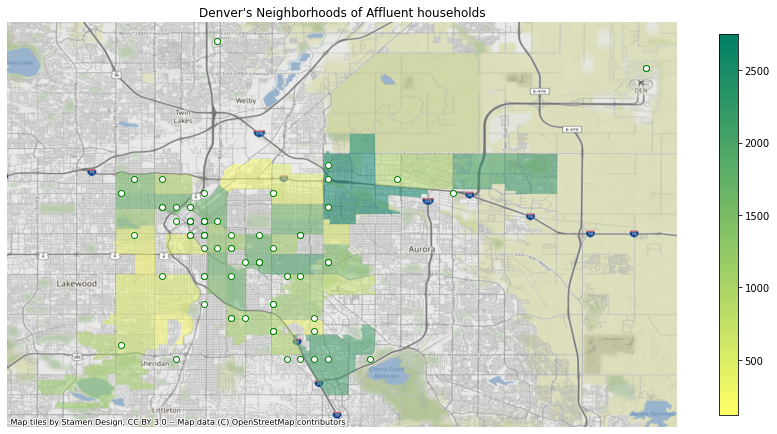

In [13]:
ax = neigh_census_aff.plot(column='NUM_HHLD_100K+', figsize=(15,20), cmap='summer_r', legend=True, legend_kwds={'shrink': 0.35}, alpha=0.5)
plt.title("Denver's Neighborhoods of Affluent households")
ax.set_axis_off()

plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')
ctx.add_basemap(ax, crs='EPSG:4326')
plt.show()

### 2.5. Visualisation of Affluent Households population amount of Age from 18 to 34.

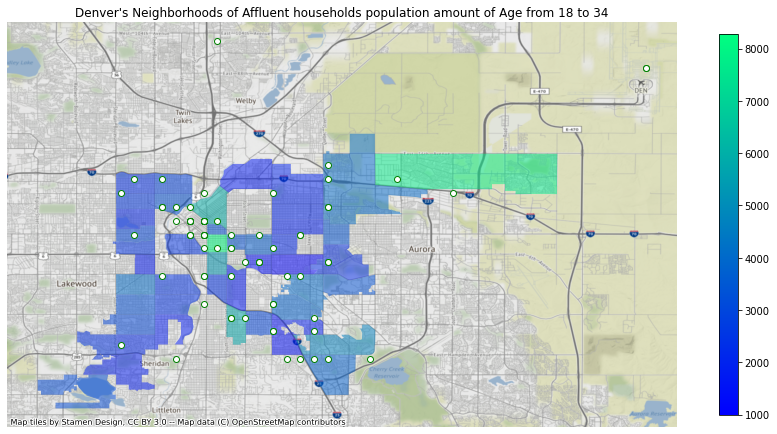

In [14]:
ax = neigh_census_aff.plot(column='AGE_18_TO_34', figsize=(15,20), cmap='winter', legend=True, legend_kwds={'shrink': 0.35}, alpha=0.5)
plt.title("Denver's Neighborhoods of Affluent households population amount of Age from 18 to 34")
ax.set_axis_off()

plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')
ctx.add_basemap(ax, crs='EPSG:4326')
plt.show()

### 2.6. Visualisation of  Affluent value of households with population amount of Age from 18 to 34.

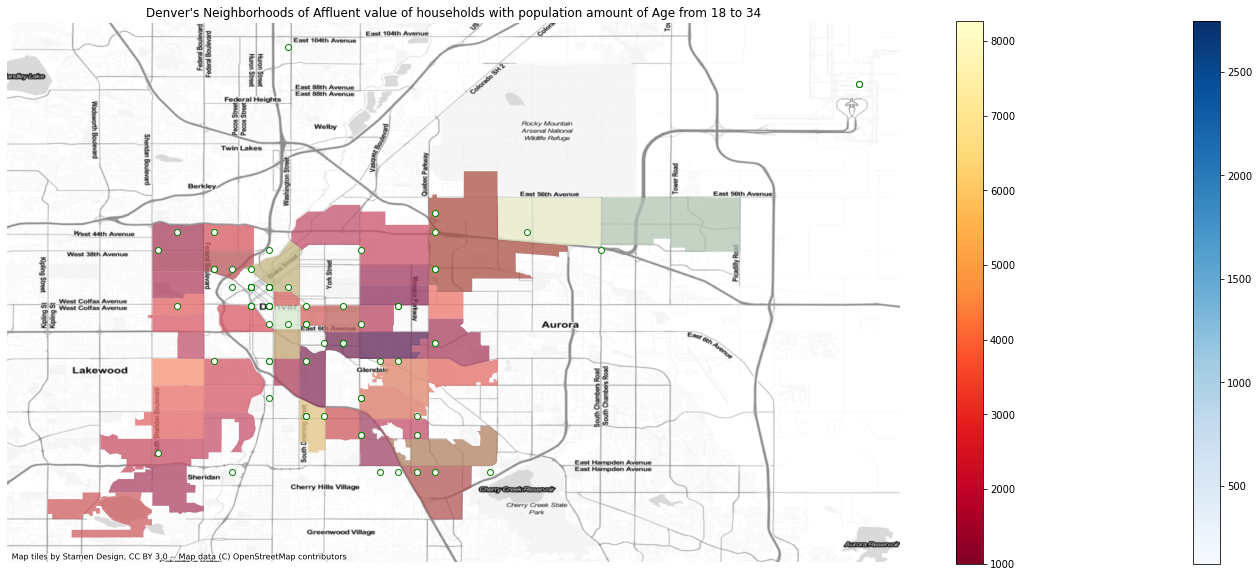

In [15]:
fig, ax = plt.subplots(figsize=(25, 40))

neigh_census_aff.plot(ax=ax, column='NUM_HHLD_100K+', figsize=(15,20), cmap='Blues', legend=True, legend_kwds={'shrink': 0.25}, alpha=0.5)

neigh_census_aff.plot(ax=ax, column='AGE_18_TO_34', figsize=(15,20), cmap='YlOrRd_r', legend=True, legend_kwds={'shrink': 0.25}, alpha=0.5)

plt.title("Denver's Neighborhoods of Affluent value of households with population amount of Age from 18 to 34")
ax.set_axis_off()

plt.scatter(x=denver['Longitude'], y=denver['Latitude'], c='white', edgecolor = 'green')

ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)
plt.show()

By mixing the Yellow color for high amount of 18-34 Age population and the Blue color for the most Affluent Households, we're getting the Green colored neighborhoods as our most likely targeted neighborhoods for the new coffee shops.

## 3. Visualisation of GeoData with folium.
### 3.1. Building the Map.

In [16]:
centroids = []

for geodata in neighborhoods.geometry:
    s = shape(geodata)
    centroid = s.centroid
    centroids.append(centroid)

neighborhoods['centroids'] = pd.DataFrame(centroids)
neigh_census['centroids'] = neighborhoods['centroids']
display(neighborhoods, neigh_census)

NBHD_ID             NBHD_NAME  \
0         2               Auraria   
1        21        Cory - Merrill   
2         7               Belcaro   
3        70       Washington Park   
4        71  Washington Park West   
..      ...                   ...   
73       77              Whittier   
74       18                  Cole   
75       76              Westwood   
76       62             Sunnyside   
77       23                   DIA   

                                             geometry  \
0   POLYGON ((-105.00042 39.74552, -105.00041 39.7...   
1   POLYGON ((-104.94070 39.69540, -104.94070 39.6...   
2   POLYGON ((-104.94070 39.71156, -104.94069 39.7...   
3   POLYGON ((-104.95931 39.71566, -104.95931 39.7...   
4   POLYGON ((-104.97342 39.68982, -104.97356 39.6...   
..                                                ...   
73  POLYGON ((-104.95977 39.75072, -104.96038 39.7...   
74  POLYGON ((-104.95975 39.76199, -104.96037 39.7...   
75  POLYGON ((-105.03970 39.71125, -105.03849 39.7...   
76  POLYGON ((-104.99818 39.78256, -104.99820 39.7...   
77  POLYGON ((-104.76269 39.79833, -104.76290 39.7...   

                                         centroids  
0    POINT (-105.00826714266104 39.74582064021649)  
1    POINT (-104.94982222433913 39.69046205356752)  
2    POINT (-104.95047721653397 39.70504350655012)  
3   POINT (-104.96626674607099 39.701238288585344)  
4    POINT (-104.97990433656067 39.70257542873643)  
..                                             ...  
73    POINT (-104.9665594300945 39.75635713588193)  
74   POINT (-104.96620155615607 39.76718552431263)  
75   POINT (-105.03920593269966 39.70401728262391)  
76   POINT (-105.01189427187757 39.77645110460263)  
77   POINT (-104.68673348951604 39.85784535899703)  

[78 rows x 4 columns]

NBHD_ID             NBHD_NAME  \
0         2               Auraria   
1        21        Cory - Merrill   
2         7               Belcaro   
3        70       Washington Park   
4        71  Washington Park West   
..      ...                   ...   
73       77              Whittier   
74       18                  Cole   
75       76              Westwood   
76       62             Sunnyside   
77       23                   DIA   

                                             geometry  POPULATION_2010  \
0   POLYGON ((-105.00042 39.74552, -105.00041 39.7...            705.0   
1   POLYGON ((-104.94070 39.69540, -104.94070 39.6...           3892.0   
2   POLYGON ((-104.94070 39.71156, -104.94069 39.7...           4172.0   
3   POLYGON ((-104.95931 39.71566, -104.95931 39.7...           6905.0   
4   POLYGON ((-104.97342 39.68982, -104.97356 39.6...           6393.0   
..                                                ...              ...   
73  POLYGON ((-104.95977 39.75072, -104.96038 39.7...           4831.0   
74  POLYGON ((-104.95975 39.76199, -104.96037 39.7...           4651.0   
75  POLYGON ((-105.03970 39.71125, -105.03849 39.7...          15486.0   
76  POLYGON ((-104.99818 39.78256, -104.99820 39.7...           9726.0   
77  POLYGON ((-104.76269 39.79833, -104.76290 39.7...           1165.0   

    AGE_18_TO_34  NUM_HOUSEHOLDS  FAMILIES  NUM_HHLD_100K+  \
0          635.0            60.0      15.0             NaN   
1          906.0          1771.0     959.0             NaN   
2          621.0          2126.0    1162.0             NaN   
3         1589.0          3307.0    1695.0          1739.0   
4         2365.0          3365.0    1291.0          1457.0   
..           ...             ...       ...             ...   
73        1586.0          1993.0    1008.0             NaN   
74        1390.0          1595.0     938.0             NaN   
75        4037.0          4340.0    3306.0           326.0   
76        2829.0          3781.0    2222.0           851.0   
77         462.0           509.0     296.0             NaN   

                                         centroids  
0    POINT (-105.00826714266104 39.74582064021649)  
1    POINT (-104.94982222433913 39.69046205356752)  
2    POINT (-104.95047721653397 39.70504350655012)  
3   POINT (-104.96626674607099 39.701238288585344)  
4    POINT (-104.97990433656067 39.70257542873643)  
..                                             ...  
73    POINT (-104.9665594300945 39.75635713588193)  
74   POINT (-104.96620155615607 39.76718552431263)  
75   POINT (-105.03920593269966 39.70401728262391)  
76   POINT (-105.01189427187757 39.77645110460263)  
77   POINT (-104.68673348951604 39.85784535899703)  

[78 rows x 9 columns]

In [17]:
denver_centers = neigh_census.geometry.centroid
denver_location = [denver_centers[75].y, denver_centers[70].x]
denver_map = folium.Map(location = denver_location, zoom_start = 10.5)

neigh_census_aff.geometry = neigh_census_aff.geometry.set_crs("EPSG:4326")

folium.GeoJson(neigh_census_aff.geometry).add_to(denver_map)

folium.Choropleth(geo_data = neigh_census_aff, name='geometry', 
                  data=neigh_census_aff, columns=["NBHD_ID","NUM_HHLD_100K+"], key_on="feature.properties.NBHD_ID", 
                  fill_color='Blues', line_color='black', fill_opacity=0.5, line_opacity=0.5,  
                  legend_name="Amount of Affluent Households (>100k per year)"
                 ).add_to(denver_map)

folium.Choropleth(geo_data = neigh_census_aff, name='geometry', 
                  data=neigh_census_aff, columns=["NBHD_ID","AGE_18_TO_34"], key_on="feature.properties.NBHD_ID", 
                  fill_color='YlOrRd_r', line_color='black', fill_opacity=0.5, line_opacity=0.5,  
                  legend_name="Amount of age 18-34 population in Affluent households (>100k per year)"
                 ).add_to(denver_map)

for row in denver.iterrows():
    row_values = row[1]
    location = [row_values['Latitude'], row_values['Longitude']]
    popup = (str(row_values['StoreNumber']) + '; '
             + str(row_values['Name']) + ', Phone Number:' + str(row_values['PhoneNumber']) + ', Adress: ' 
             + str(row_values['Street1']) + ' ' + str(row_values['Street2']) +' '+ str(row_values['Street3']))
    
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color="green", icon="star-empty") )
    marker.add_to(denver_map)
    
for row in neigh_census.iterrows():
    row_values = row[1]
    location = [row_values['centroids'].y, row_values['centroids'].x]
    popup = (str(row_values['NBHD_NAME']))
    
    marker2 = folium.Marker(location = location, popup = popup, icon=folium.Icon(color="blue", icon="glyphicon-home") )
    marker2.add_to(denver_map)
    
display(denver_map)

### 3.2. Observing and explaining the map.

![title](img/coffe_map_total.jpg)

By mixing the <b>Yellow</b> color for high amount of <b>18-34 Age</b> population <b>and the Blue</b> color for the most <b>Affluent Households</b>, we're getting the <b>Green colored</b> neighborhoods as our most likely <b>targeted</b> neighborhoods for the new coffee shops.

![title](img/coffee_map_1.jpg)

The <b>Gateway - Green Valley Ranch</b> is the <b>Top 1</b> neighborhood of the most Affluent Households with high amount of 18-34 Age population.

![title](img/coffee_map_2.jpg)

The <b>Top 2</b> is <b>Capitol Hill</b> neighborhood.<br>
<br>
And if we're watching for the best-combines Age 18-34 and Affluent Households proportion, then there is should be <b>Top 3</b> - the <b>Montbello</b> neighborhood.

![title](img/coffee_map_3.jpg)

## 4. Finding Top 10 by multiplication.

In [18]:
neigh_census_aff['Aff_x_Age'] = neigh_census_aff['NUM_HHLD_100K+'] * neigh_census_aff['AGE_18_TO_34']
Top_Aff_x_Age = neigh_census_aff.sort_values('Aff_x_Age', ascending=False)[['NBHD_NAME']].reset_index(drop=True)
Top_Aff_x_Age.columns = ['Top']
display(Top_Aff_x_Age.head(10))

Top
0  Gateway - Green Valley Ranch
1                  Central Park
2                  Capitol Hill
3                       Hampden
4                   Five Points
5                         Speer
6                 Hampden South
7                     Montbello
8                 Congress Park
9                    University

By multiplication of the Targeted Age-group parameter by the Affluent Households value, we could find a different combination of top 10 neighborhoods. But on the map we can see by the color, that they're not totally met the both conditions in a good proportion. For example the Central Park neighborhood have extremely Affluent Households, but comparely low population of the targeted Age-group. Another neighborhoods of multiplicated Top-10 are the same way or vice versa.

## 5. Conclusion and recommendation.

For the new coffee shops you could choose the <b>Gateway - Green Valley Ranch</b>, <b>Capitol Hill</b> and <b>Montbello</b> neighborhoods, if you need the neighborhoods which have the targeted conditions (Affluent Households and Age-group) in a good proportion existing.<br>
<br>
You could specify your target group more specifically, if you want to figure out the more options.

![title](img/end_pic_map.jpg)